In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import emoji
import unicodedata

## Data reading

In [2]:
def merge_train_dev(path_train, path_dev, path_test):
    train= path_train
    en_train = pd.read_csv(train)
    en_train['source'] = 'train'
    dev= path_dev
    en_dev = pd.read_csv(dev)
    en_dev['source'] = 'dev'
    test= path_test
    en_test = pd.read_csv(test)
    en_test['source'] = 'dev'
    # Concatenate the DataFrames
    en_merged = pd.concat([en_train, en_dev, en_test], ignore_index=True)
    return en_merged
    

## Merging datasets

## English

Data augmentation for english

In [3]:
en_train= pd.read_csv('Training Data/en_train.csv')
en_aug= pd.read_csv('Training Data/en_train_augmented.csv')
en_aug = en_aug.drop(columns=['text']).rename(columns={'text_en': 'text'})
# Concatenate the original and translated datasets
df_combined = pd.concat([en_train, en_aug], ignore_index=True)
# Check the counts of 'multiclass' in the combined dataset
category_counts = df_combined['multiclass'].value_counts()
# Determine the minimum count of classes across both datasets
min_sub_counts = category_counts[['Generalized Hope', 'Unrealistic Hope', 'Realistic Hope']].min()

# Sample from each category to balance the counts
df_balanced = pd.concat([
    df_combined[df_combined['multiclass'] == 'Generalized Hope'].sample(n=min_sub_counts, random_state=42),
    df_combined[df_combined['multiclass'] == 'Unrealistic Hope'].sample(n=min_sub_counts, random_state=42),
    df_combined[df_combined['multiclass'] == 'Realistic Hope'].sample(n=min_sub_counts, random_state=42),
    df_combined[df_combined['multiclass'] == 'Not Hope'].sample(n=4900, random_state=42)  # Include all 'A' samples as is
], ignore_index=True)
df_balanced['multiclass'].value_counts()
df_balanced.to_csv('Training Data/en_train_balanced.csv',index=False)

In [4]:
en_merged= merge_train_dev('Training Data/en_train.csv','Training Data/en_dev.csv', 'TestWithNoLabel/en_test_without_labels.csv')
en_merged

,text,binary,multiclass,source
0,#USER# #USER# #USER# #USER# You expect a man t...,Not Hope,Not Hope,train
1,#USER# #USER# #USER# #USER# Tinubu is actually...,Not Hope,Not Hope,train
2,#USER# Anyway love u bubbly i know i can count...,Hope,Generalized Hope,train
3,“you have a lot of people rooting for you whet...,Not Hope,Not Hope,train
4,Hoping to get on the brown a lot more after I ...,Not Hope,Not Hope,train
...,...,...,...,...
8251,I am grateful to have a laptop to play games o...,NaN,NaN,dev
8252,#USER# This is the level of enjoyment I aspire...,NaN,NaN,dev
8253,"#USER# Embarrassed by your airlines. Delays, o...",NaN,NaN,dev
8254,OH HELL NAW! They deadass out here making choc...,NaN,NaN,dev


In [5]:
# Merge dataset with augmentation
en_merged_aug= merge_train_dev('Training Data/en_train_balanced.csv','Training Data/en_dev.csv', 'TestWithNoLabel/en_test_without_labels.csv')

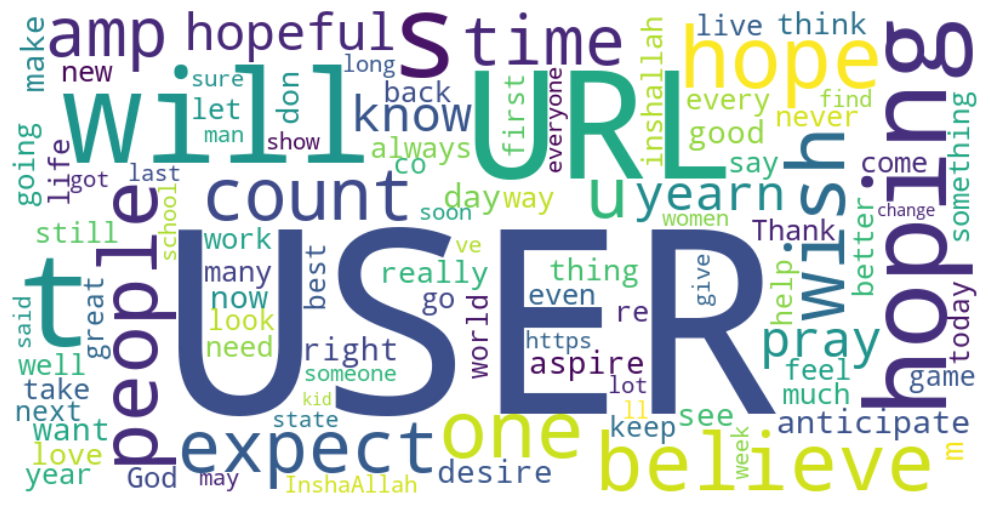

In [6]:
en_text = ' '.join(en_merged['text'].astype(str))
wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    max_words=100,
    collocations=False
).generate(en_text)

# Step 3: Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

## Spanish

In [9]:
es_merged= merge_train_dev('Training Data/es_train.csv','Training Data/es_dev.csv','TestWithNoLabel/es_test_without_labels.csv')
es_merged

,text,binary,multiclass,source
0,🎬Outer Banks🎬 (temporada 3) la verdad que teni...,Hope,Generalized Hope,train
1,-Después del poco éxito en el grupo de la Jet ...,Hope,Generalized Hope,train
2,Bárbara López yo te rezo y te hago un monument...,Hope,Generalized Hope,train
3,RT #USER# #USER# #USER# Ojalá nos ayuden a des...,Hope,Realistic Hope,train
4,#USER# No tengo las palabras justas. Pero rezo...,Hope,Realistic Hope,train
...,...,...,...,...
19178,"Jugamos con 10, hay que rezar por los laterale...",NaN,NaN,dev
19179,#USER# De contenido antirracista escucho mucho...,NaN,NaN,dev
19180,#USER# ¡Comprado! ¡Muchas gracias! Ojalá la ed...,NaN,NaN,dev
19181,#USER# Siento una tristeza tan grande cuando v...,NaN,NaN,dev


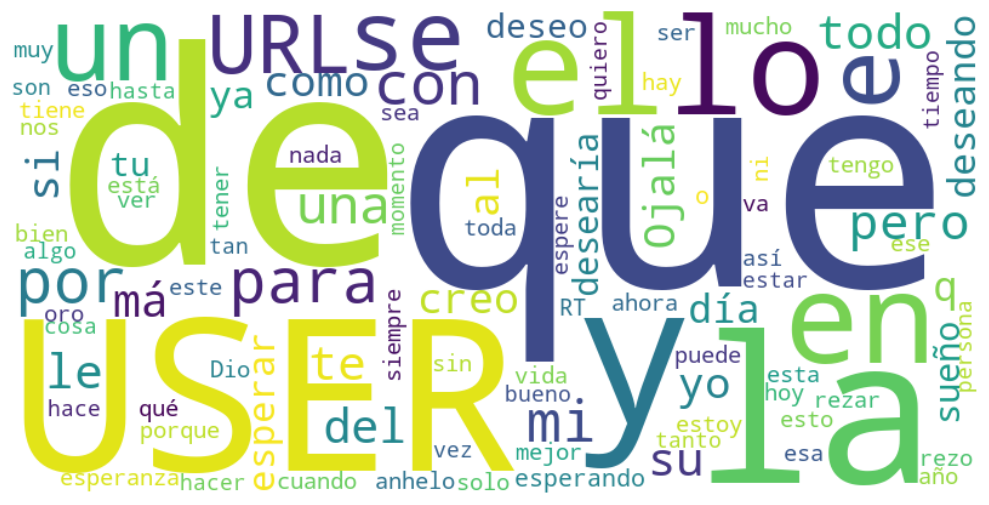

In [10]:
es_text = ' '.join(es_merged['text'].astype(str))
wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    max_words=100,
    collocations=False
).generate(es_text)

# Step 3: Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

## German

In [11]:
ge_merged= merge_train_dev('Training Data/German_train.csv','Training Data/German_dev.csv','TestWithNoLabel/German_test_without_labels.csv')
ge_merged

,text,binary,multiclass,source
0,"Träume von einem sonnendurchfluteten Wald, wel...",Hope,Unrealistic Hope,train
1,#USER# #USER# #USER# #USER# Ich kann verstehen...,Not Hope,Not Hope,train
2,"#USER# #USER# Hochinteressant, als Volldepp mü...",Not Hope,Not Hope,train
3,#USER# Ich beneide Dich ehrlich positiv darum....,Not Hope,Not Hope,train
4,#USER# #USER# #USER# Auch das behauptet nieman...,Not Hope,Not Hope,train
...,...,...,...,...
21038,"#USER# #USER# Meine Mutter auch, bakterielle B...",NaN,NaN,dev
21039,#USER# #USER# #USER# Und das sind sie indem si...,NaN,NaN,dev
21040,"#USER# Ich freu mich schon auf das erste Kind,...",NaN,NaN,dev
21041,WIR KÖNNEN NACH EINEM FREISTOẞ TREFFEN ICH TRÄ...,NaN,NaN,dev


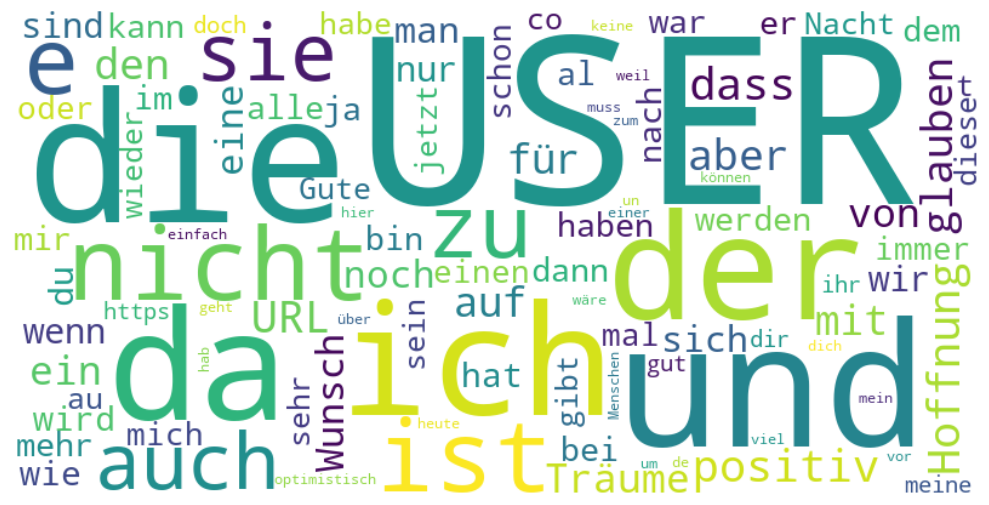

In [12]:
ge_text = ' '.join(ge_merged['text'].astype(str))
wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    max_words=100,
    collocations=False
).generate(ge_text)

# Step 3: Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

## Urdu

Data augmentation for urdu

In [13]:
ur_train= pd.read_csv('Training Data/ur_train.csv')
ur_aug= pd.read_csv('Training Data/ur_train_augmented.csv')
ur_aug = ur_aug.drop(columns=['text']).rename(columns={'text_ur': 'text'})
# Concatenate the original and translated datasets
df_combined = pd.concat([ur_train, ur_aug], ignore_index=True)
# Check the counts of 'multiclass' in the combined dataset
category_counts = df_combined['multiclass'].value_counts()
# Determine the minimum count of Sub1, Sub2, and Sub3 across both datasets
min_sub_counts = category_counts[['Generalized Hope', 'Unrealistic Hope', 'Realistic Hope']].min()

# Sample from 'Sub1', 'Sub2', and 'Sub3' categories to balance the counts
df_balanced = pd.concat([
    df_combined[df_combined['multiclass'] == 'Generalized Hope'].sample(n=min_sub_counts, random_state=42),
    df_combined[df_combined['multiclass'] == 'Unrealistic Hope'].sample(n=min_sub_counts, random_state=42),
    df_combined[df_combined['multiclass'] == 'Realistic Hope'].sample(n=min_sub_counts, random_state=42),
    df_combined[df_combined['multiclass'] == 'Not Hope'].sample(n=4500, random_state=42)  # Include all 'A' samples as is
], ignore_index=True)
df_balanced['binary'].value_counts()
df_balanced.to_csv('Training Data/ur_train_balanced.csv',index=False)

In [14]:
ur_merged= merge_train_dev('Training Data/ur_train.csv','Training Data/Ur_dev.csv','TestWithNoLabel/Ur_test_without_labels.csv')


In [15]:
# Merge dataset with augmentation
ur_merged_aug= merge_train_dev('Training Data/ur_train_balanced.csv','Training Data/Ur_dev.csv','TestWithNoLabel/Ur_test_without_labels.csv')

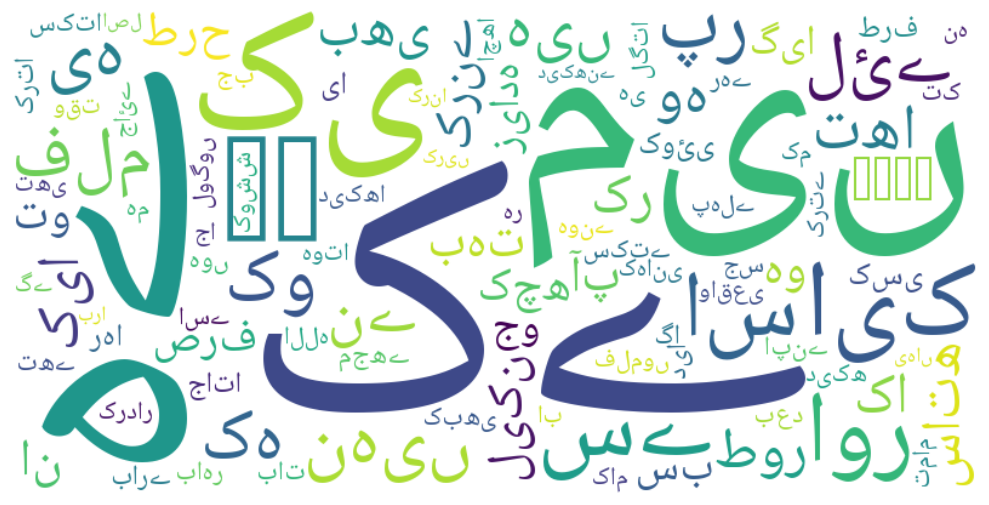

In [16]:
ur_text = ' '.join(ur_merged['text'].astype(str))
wordcloud = WordCloud(
    font_path="NotoNaskhArabic-Regular.ttf",
    width=800, 
    height=400,
    background_color='white',
    max_words=100,
    collocations=False
).generate(ur_text)

# Step 3: Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

## Data cleaning

In [17]:
def remove_links(s):
    # remove url links
    return re.sub(r'\b(?:http|https):\/\/[\w.\/]*\b', "", s)

In [18]:
def remove_spaces(s):
    # remove spaces   
    return re.sub(r'\s+', ' ', s)

In [19]:
def remove_repeated_emojis(text):
    pattern = re.compile(r'([\U0001F300-\U0001F6FF\U0001F900-\U0001F9FF])\1+')
    return pattern.sub(r'\1', text)

In [20]:
# Convert emojis to their text descriptions
def replace_emoji_with_text(text):
    return emoji.demojize(text, delimiters=["[", "]"])

In [21]:
# remove punctuation
def nonAlphabetRemoval_es_en(word):
    if not isinstance(word, str):
        return ""

    # Define valid Spanish characters (lowercase and uppercase)
    spanish_chars = set("abcdefghijklmnñopqrstuvwxyz!?#0123456789 ")

    # Keep only characters in the Spanish alphabet (and spaces)
    return ''.join(char for char in word if char in spanish_chars)

In [22]:
# remove punctuation
def nonAlphabetRemoval_ge(word):
    if not isinstance(word, str):
        return ""

    # Define valid Spanish characters (lowercase and uppercase)
    ge_chars = set("abcdefghijklmnopqrstuvwxyzäöüß!?#0123456789 ")

    # Keep only characters in the Spanish alphabet (and spaces)
    return ''.join(char for char in word if char in ge_chars)

In [23]:
# remove punctuation
def nonAlphabetRemoval_ur(word):
    if not isinstance(word, str):
        return ""

    # Define valid Spanish characters (lowercase and uppercase)
    ur_chars = set("abcdefghijklmnopqrstuvwxyzا ب پ ت ٹ ث ج چ ح خ د ڈ ذ ر ڑ ز ژ س ش ص ض ط ظ ع غ ف ق ک گ ل م ن ں و ہ ھ ء ی ے۰۱۲۳۴۵۶۷۸۹!?# ")

    # Keep only characters in the Spanish alphabet (and spaces)
    return ''.join(char for char in word if char in ur_chars)

In [24]:
def data_cleaning(df):
    df['clean_text']= df['text'].str.lower()
    df['clean_text']= df['clean_text'].str.replace(r"á", "a", regex=True)
    df['clean_text']= df['clean_text'].str.replace(r"é", "e", regex=True)
    df['clean_text']= df['clean_text'].str.replace(r"í", "i", regex=True)
    df['clean_text']= df['clean_text'].str.replace(r"ó", "o", regex=True)
    df['clean_text']= df['clean_text'].str.replace(r"ú", "u", regex=True)
    df['clean_text']= df['clean_text'].str.replace(r"#user#", "", regex=True)
    df['clean_text']= df['clean_text'].str.replace(r"#url#", "", regex=True)
    df['clean_text']= df['clean_text'].str.replace(r"rt ", "", regex=True)
    df['clean_text']= df['clean_text'].apply(remove_links)
    df['clean_text']= df['clean_text'].apply(remove_spaces)
    df['clean_text']= df['clean_text'].apply(remove_repeated_emojis)
    df['clean_text']= df['clean_text'].apply(replace_emoji_with_text)

In [ ]:
data_cleaning(en_merged)
data_cleaning(en_merged_aug)
en_merged['clean_text']= en_merged['clean_text'].apply(nonAlphabetRemoval_es_en)
en_merged_aug['clean_text']= en_merged_aug['clean_text'].apply(nonAlphabetRemoval_es_en)

data_cleaning(es_merged)
es_merged['clean_text']= es_merged['clean_text'].apply(nonAlphabetRemoval_es_en)

data_cleaning(ge_merged)
ge_merged['clean_text']= ge_merged['clean_text'].apply(nonAlphabetRemoval_ge)

data_cleaning(ur_merged)
data_cleaning(ur_merged_aug)
ur_merged['clean_text']= ur_merged['clean_text'].apply(nonAlphabetRemoval_ur)
ur_merged_aug['clean_text']= ur_merged_aug['clean_text'].apply(nonAlphabetRemoval_ur)

NameError: name 'ur_merged_aug_merged' is not defined

In [ ]:
en_merged['language']= 'english'
en_merged_aug['language']= 'english'
es_merged['language']= 'spanish'
ge_merged['language']= 'german'
ur_merged['language']= 'urdu'
ur_merged_aug['language']= 'urdu'
dataset_merged = pd.concat([en_merged, es_merged,ge_merged,ur_merged], ignore_index=True)
dataset_merged_aug = pd.concat([en_merged_aug, es_merged,ge_merged,ur_merged_aug], ignore_index=True)
dataset_merged.to_csv("dataset_merged_ranlp.csv", index=False,  encoding='utf-8-sig')
dataset_merged_aug.to_csv("dataset_merged_ranlp_augmented.csv", index=False,  encoding='utf-8-sig')